<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

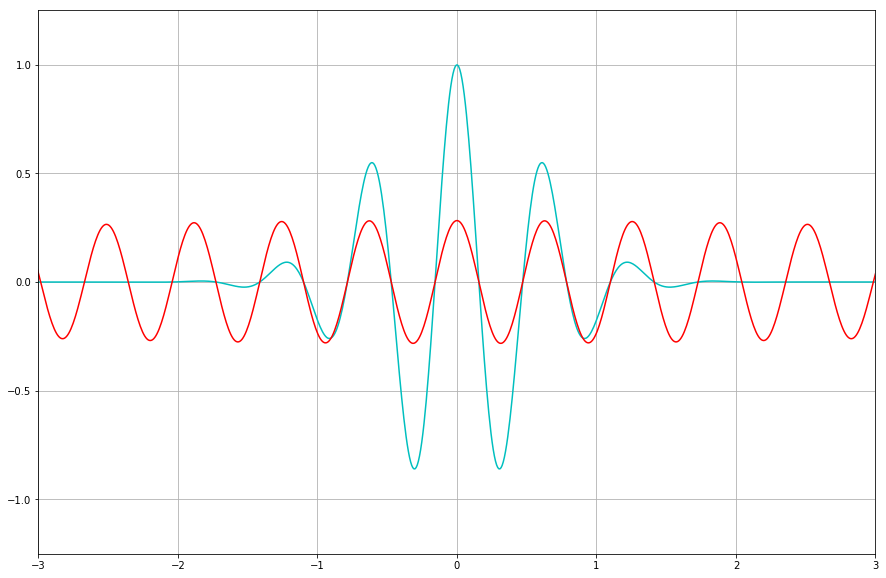

In [10]:
'''
Plots a free particle gaussian wave packet
Made by Devon DeJohn for PHY-2811
'''

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from IPython.display import display, Math
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

def gauss(e, k):
    return (2*e**2*np.pi)**(-1/4) * np.exp(-(x/(2*e))**2) * np.cos(k * x)

# data for plot
x = np.linspace(-4.0, 4.0, 1000)
g1 = gauss(0.4, 10)
g2 = gauss(5.0, 10)

# numerically finds the x-values of local maximums and puts them in an array
# found here: https://stackoverflow.com/a/9667121
g1_max = (diff(sign(diff(g1))) < 0).nonzero()[0] + 1
g2_max = (diff(sign(diff(g2))) < 0).nonzero()[0] + 1

# zips two lists and subtracts the elements, giving us a peak-to-peak distance measurement
def wavelengths(el):
    return [abs(j-i) for i,j in zip(el, el[1:])]

# returns an array of distances between local maximums
el_1 = wavelengths(x[g1_max])
el_2 = wavelengths(x[g2_max])

# mean distances between local maximums, and their standard deviations
mean_1 = np.mean(el_1)
std_1 = np.std(el_1)
mean_2 = np.mean(el_2)
std_2 = np.std(el_2)

# plotting stuff
fig, ax = plt.subplots()
ax.plot(x, g1, 'c', x, g2, 'r')

# LaTeX display stuff found here: https://stackoverflow.com/a/13222501/
display(Math(r'$\LARGE{\mathbb{R}[\Psi(x)]=\frac{e^{-x^2/4\varepsilon^2}}{(2\varepsilon^2\pi)^{\small{1/4}}}cos(k_{0}x)}$'))
display(Math(r'\lambda_1={}\pm{}'.format(round(mean_1,5),round(std_1,5))))
display(Math(r'\lambda_2={}\pm{}'.format(round(mean_2,5),round(std_2,5))))

# show me the money
ax.grid()
plt.axis([-3.0, 3.0, -1.25, 1.25])
plt.show()